# Classification and Regression trees
## Algorithm description
The CART algorithm provides the foundation for important algorithms like bagged decision trees, random forest and boosted decision trees. The output of a CART is a decision tree where each fork is a split in a predictor variable and each end node contains a prediction for the response variable. Essentially, it sequentially asks a series of if-else questions about individual features in a dataset in order to split it for classification.

## Data description and goal
 The data comes from Breast cancer Wisconsin (Diagnostic) data (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

The objective is to predict whether a tumour is malignant or benign based on two features (radius_mean, concave points_mean)

## Import packages
The packages we need for the downstream analysis

In [28]:
from matplotlib import pyplot as plt
import plotly_express as px
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np 

## Exploratory data analysis (EDA) 
This is where we investigate the datasets characteristics and observe the data directly to identify underlying issues with missing data and outliers. Given this is a curated example, this won't be an issue. However, this is always an important step when conducting any statistical analysis.

In [9]:
# Prepare the data data
iris = datasets.load_iris()

# Description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
# Create pandas dataframe from SciKit-learns bunch object

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

iris_df['target'] = iris.target

# Create the dictionary
species_dictionary = {0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}

# Assign new column values
iris_df['Species'] = iris_df['target'].map(species_dictionary).astype(str)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,Iris-Setosa
1,4.9,3.0,1.4,0.2,0,Iris-Setosa
2,4.7,3.2,1.3,0.2,0,Iris-Setosa
3,4.6,3.1,1.5,0.2,0,Iris-Setosa
4,5.0,3.6,1.4,0.2,0,Iris-Setosa


In [40]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [50]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   Species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


<Figure size 576x576 with 0 Axes>

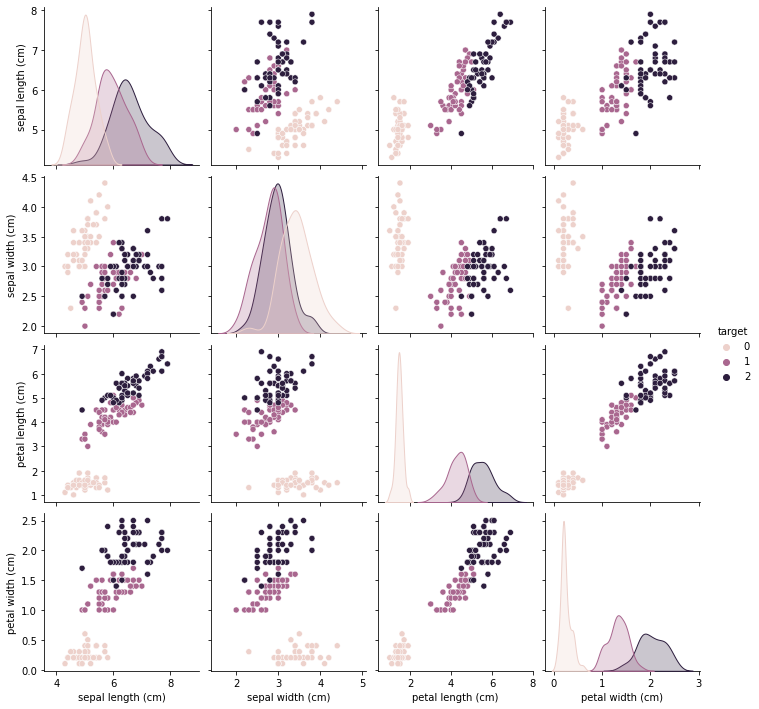

In [55]:
plt.figure(figsize=(8, 8))
ax = sns.pairplot(iris_df, hue='target')
plt.show()

In [60]:
px.scatter_3d(iris_df, x="petal length (cm)", y="petal width (cm)", z="sepal length (cm)", size="sepal width (cm)", 
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

## EDA outcomes
- There aren't any missing values, all columns have 150 values. Therefore it's not necessary to account for missing values.
- All data types are numerical (float64/int32). This is important as Scikit-Learn models do not accept categorical data. These must be converted into dummy variables represented as 0s and 1s.
- 

# Classification and Regression

In [61]:
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

NameError: name 'train_test_split' is not defined

In [3]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)

model = clf.fit(X, y)

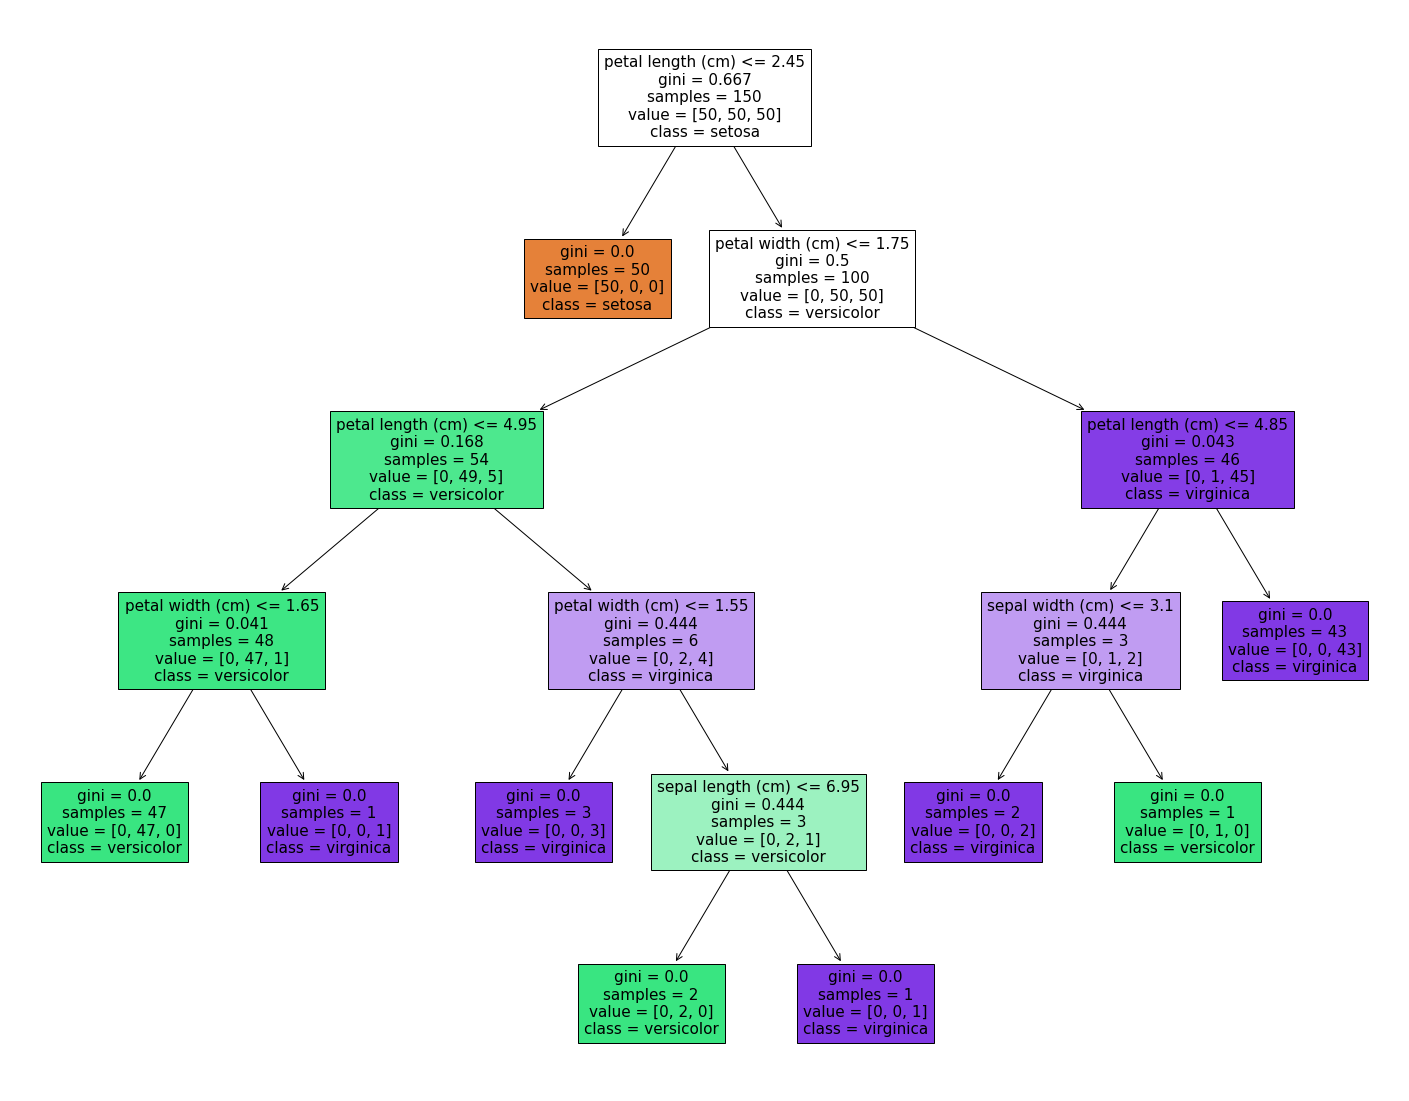

In [5]:
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

fig.savefig("decistion_tree.png")